<a href="https://colab.research.google.com/github/RerarooM/TSF-GRIP/blob/main/TSF_GRIP_TASK2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TSF GRIP TASK2-Prediction using Unsupervised ML**


**Author: Muskaan Raj**


**Predict the optimum number of clusters
and represent it visually, from 'Iris-dataset'.**

Dataset: https://bit.ly/3kXTdox

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

**Data**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#loading data
print("Importing data...")
df  = pd.read_csv("/content/drive/MyDrive/TSF/Iris.csv")
print("Sucessfully imported.")

df.head() #to check sucessful importation of dataset.

Importing data...
Sucessfully imported.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Analysis:** 

In [ ]:
df.shape #to get no. of rows and column(rows,column)

(150, 6)

In [ ]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can say that there is not any data point is missing in any feature. And indexes are from 0 to 149 for 150 entries

In [ ]:
#description of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


From the above discription count tells that all the 4 features have 150 rows and from Mean we can say that sepal is larger than petal.

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

we can observe all three classes are equally distributed in terms of the number of counts of each class.

In [ ]:
#Create 3 DataFrame for each Species
setosa=df[df['Species']=='Iris-setosa']
versicolor =df[df['Species']=='Iris-versicolor']
virginica =df[df['Species']=='Iris-virginica']

print("SETOSA:\n",setosa.describe())
print("\nVERSICOLOR:\n",versicolor.describe())
print("\nVIRGINICA:\n",virginica.describe())

SETOSA:
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

VERSICOLOR:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop(columns=["Id"],axis=1, inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Visualisation:**

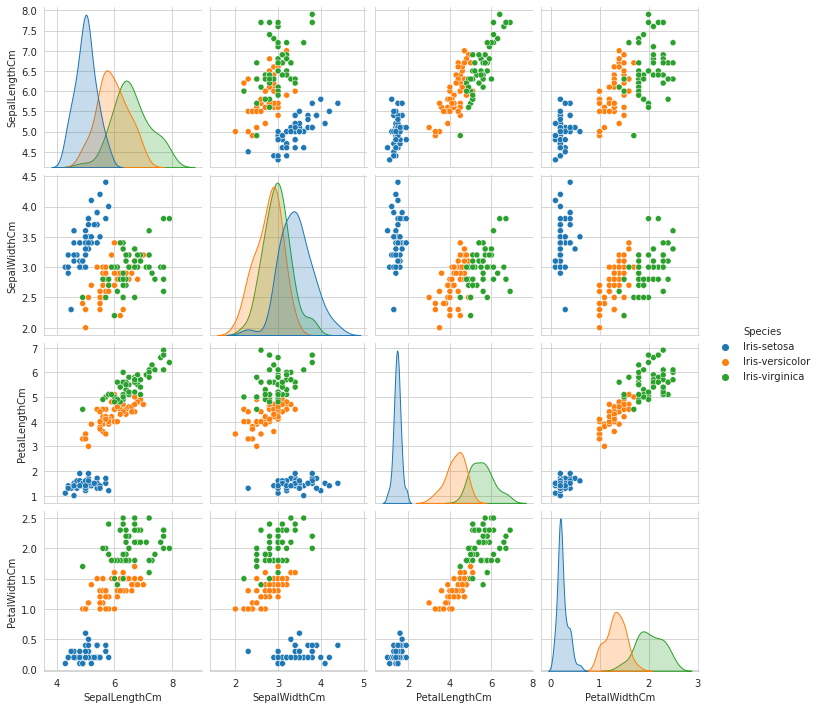

In [ ]:
#ploting graph usning seaborn
sns.set_style('whitegrid')
sns.pairplot(data = df, hue='Species')

We can observe from the pair plot that petal length and petal width are the most useful features to classify iris flower to there respective class.
Verginica and Versicolor are a little bit overlapped but they are almost linearly separable.

**KMeans**

In [ ]:
#finging optimal no of cluster for kmeans classification
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []  #within cluster sum of squares
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init = 'k-means++',n_init=10,max_iter=300,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Elbow method

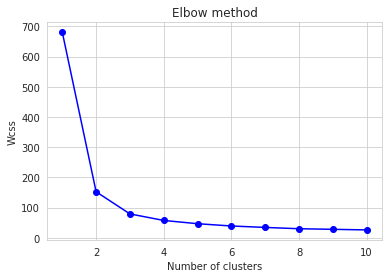

In [ ]:
#Using the elbow method to determine the optimal number of clusters for k-means clustering
plt.plot(range(1,11),wcss,marker='o', color='b')
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

We can see there is drastic drop when it came to 3 so this is where kmeans clustring has to be made.
So, with the elbow method we can find out or identify the most optimal no. of cluster.
Therefore, here the no. of cluster = **3**

**Implimenting KMeans Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_kmeans = kmeans.fit_predict(x)

Visualising the cluster

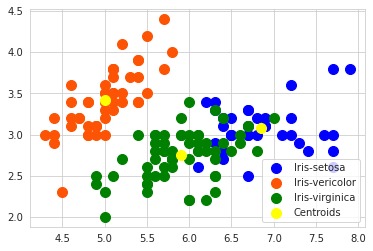

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'b', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = '#fc5404', label = 'Iris-vericolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'g', label = 'Iris-virginica')

#for centorids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()